In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Path dataset di Google Drive
base_dir = '/content/drive/My Drive/PROJEK PCD/'
class_names = ['matahari', 'bougenville', 'aglonema']  # Ganti dengan nama folder Anda

# Folder untuk train dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Membuat folder train dan validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

for class_name in class_names:
    class_folder = os.path.join(base_dir, class_name)
    images = os.listdir(class_folder)

    # Membagi data train dan validation
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Membuat folder kelas di train dan validation
    train_class_folder = os.path.join(train_dir, class_name)
    val_class_folder = os.path.join(validation_dir, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)

    # Memindahkan gambar
    for img in train_images:
        shutil.move(os.path.join(class_folder, img), os.path.join(train_class_folder, img))
    for img in val_images:
        shutil.move(os.path.join(class_folder, img), os.path.join(val_class_folder, img))

print("Dataset berhasil dipindahkan!")


Dataset berhasil dipindahkan!


In [ ]:
# Path ke dataset
data_dir = '/content/drive/MyDrive/PROJEK PCD'

# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir + '/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
# Menggunakan transfer learning dengan VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callback untuk early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[callback]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 197s 17s/step - accuracy: 0.3634 - loss: 1.3225 - val_accuracy: 0.4500 - val_loss: 1.0573
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 11s/step - accuracy: 0.5276 - loss: 0.9952 - val_accuracy: 0.5667 - val_loss: 0.9313
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.5363 - loss: 0.9171 - val_accuracy: 0.5833 - val_loss: 0.8472
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 143s 12s/step - accuracy: 0.7002 - loss: 0.7663 - val_accuracy: 0.7167 - val_loss: 0.7577
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 116s 12s/step - accuracy: 0.6747 - loss: 0.7121 - val_accuracy: 0.7667 - val_loss: 0.6831
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 118s 12s/step - accuracy: 0.7615 - loss: 0.6415 - val_accuracy: 0.7667 - val_loss: 0.6527
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 161s 14s/step - accuracy: 0.8038 - loss: 0.6034 - val_accuracy: 0.8000 - val_loss: 0.5480
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 116s 12s/step - accuracy: 0.7816 - loss: 0.5881 - val_accuracy: 0.8167 - val_loss: 0.5188
Epo

In [ ]:
# Evaluasi model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.9451 - loss: 0.2646
Validation Accuracy: 93.33%
8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 10s/step - accuracy: 0.9343 - loss: 0.2539
Train Accuracy: 91.67%


2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step
Confusion Matrix


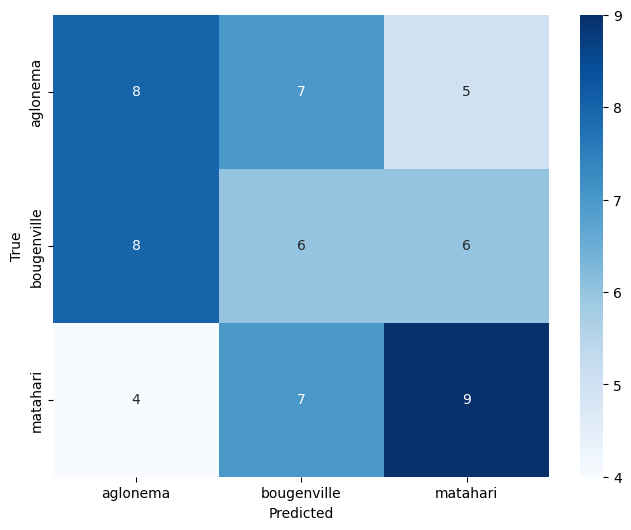

Classification Report
              precision    recall  f1-score   support

    aglonema       0.40      0.40      0.40        20
 bougenville       0.30      0.30      0.30        20
    matahari       0.45      0.45      0.45        20

    accuracy                           0.38        60
   macro avg       0.38      0.38      0.38        60
weighted avg       0.38      0.38      0.38        60



In [ ]:
# Confusion Matrix dan Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=train_generator.class_indices.keys()))

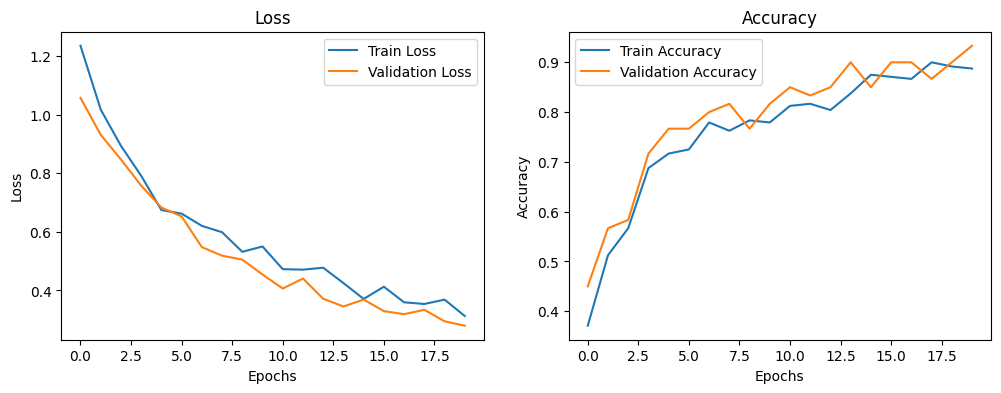

In [ ]:
# Visualisasi training history
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/UJI SAMPEL/HASIL KLASIFIKASI BUNGA.h5')


In [ ]:
# Path ke model
model = load_model('/content/drive/MyDrive/UJI SAMPEL/HASIL KLASIFIKASI BUNGA.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


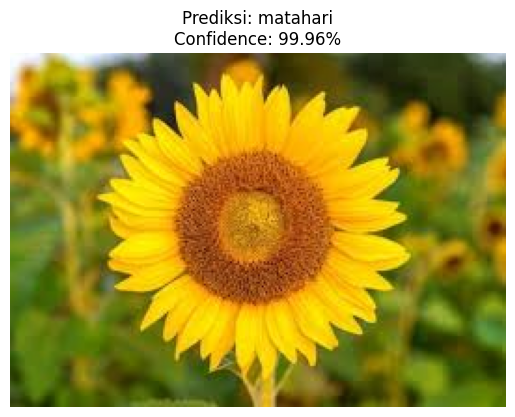

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


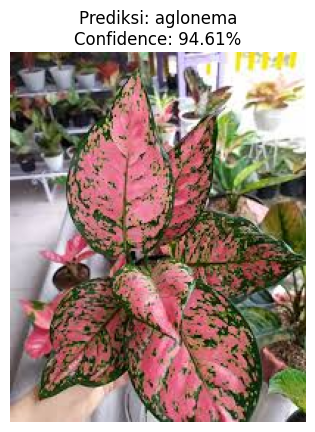

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


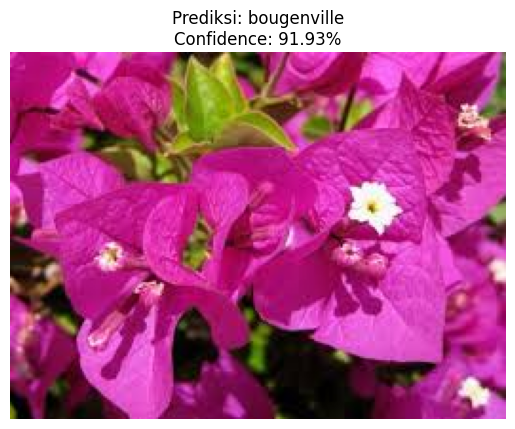

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np



# Mapping indeks ke kelas (definisikan sesuai dengan dataset Anda)
class_indices = {0: 'aglonema', 1: 'bougenville', 2: 'matahari'}

# Folder yang berisi gambar untuk diuji
test_folder = '/content/drive/MyDrive/UJI SAMPEL/'

# Loop melalui semua gambar di folder
for img_file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_file)
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Pastikan hanya file gambar yang diproses
        try:
            # Preprocess gambar
            image = load_img(img_path, target_size=(150, 150))  # Sesuaikan ukuran dengan input model
            image_array = img_to_array(image) / 255.0  # Normalisasi
            image_array = np.expand_dims(image_array, axis=0)  # Tambahkan dimensi batch

            # Prediksi
            predictions = model.predict(image_array)
            predicted_class = class_indices[np.argmax(predictions)]
            confidence = np.max(predictions) * 100

            # Menampilkan gambar
            plt.figure()
            plt.imshow(load_img(img_path))  # Tampilkan gambar asli
            plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence:.2f}%")
            plt.axis('off')  # Hilangkan axis untuk tampilan lebih rapi
            plt.show()

        except Exception as e:
            print(f"Error memproses gambar {img_file}: {e}")
